In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="1" #model will be trained on GPU 1

In [2]:
#!pip install seaborn
import seaborn as sns

In [2]:
import os
import cv2
import tensorflow.keras as keras 
#from tensorflow.keras.layers import Input,Dense,Flatten,Dropout,Reshape,Conv2D,MaxPooling2D,UpSampling2D,Conv2DTranspose
#from tensorflow.keras.layers.normalization import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
#from keras.optimizers import Adadelta, RMSprop,SGD,Adam
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K

In [3]:
import numpy as np
import scipy.misc
import numpy.random as rng
from PIL import Image, ImageDraw, ImageFont
from sklearn.utils import shuffle
#!pip install nibabel
import nibabel as nib #reading MR images
from sklearn.model_selection import train_test_split
import math
import glob
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
ff = glob.glob('E:/Gm_yes_new/*')

In [5]:
len(ff)

330

In [6]:
gg = glob.glob('E:/Gm_no_new/*')

In [7]:
len(gg)

299

In [8]:
list=ff+gg

In [9]:
len(list)

629

In [10]:
new_list = np.asarray(list)

In [11]:
images = []
Y=[]
for f in range(len(ff)):
    a = nib.load(ff[f])
    a = a.get_data()
    a = a[:,78:129,:]
    for i in range(a.shape[1]):
        Y.append("Yes")
        images.append((a[:,i,:]))
print (a.shape)

C:\Users\Dell\anaconda3\envs\labelme\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """
C:\Users\Dell\anaconda3\envs\labelme\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """
C:\Users\Dell\anaconda3\envs\labelme\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data

(121, 51, 121)


C:\Users\Dell\anaconda3\envs\labelme\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """
C:\Users\Dell\anaconda3\envs\labelme\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """


In [12]:
len(Y)

16830

In [13]:
#images = np.asarray(images)

In [14]:
len(images)

16830

In [15]:
print(images[0].shape)

(121, 121)


In [16]:
images1 = []
Y1=[]
for f in range(len(gg)):
    a = nib.load(gg[f])
    a = a.get_data()
    a = a[:,78:129,:]
    for i in range(a.shape[1]):
        Y1.append("No")
        images1.append((a[:,i,:]))
print (a.shape)

C:\Users\Dell\anaconda3\envs\labelme\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """
C:\Users\Dell\anaconda3\envs\labelme\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """
C:\Users\Dell\anaconda3\envs\labelme\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data

(121, 51, 121)


C:\Users\Dell\anaconda3\envs\labelme\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """


In [17]:
print(a.shape)

(121, 51, 121)


In [18]:
len(images1)

15249

In [19]:
len(Y1)

15249

In [20]:
Y1[0]

'No'

In [21]:
images_new=images+images1

In [22]:
len(images_new)

32079

In [23]:
images[5444]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
Y_new=Y+Y1

In [25]:
len(Y_new)

32079

In [26]:
images_new = np.asarray(images_new)

In [27]:
images_new.shape #dimension of each image is 121x121

(32079, 121, 121)

In [28]:
images_new = images_new.reshape(-1, 121,121,1)

In [29]:
images_new.shape #preprocessing by converting each image into a matrix of size 121X121X1

(32079, 121, 121, 1)

In [30]:
m = np.max(images_new) #rescaling using max-min normalization
mi = np.min(images_new)

In [31]:
m, mi

(1.0000000591389835, 0.0)

In [32]:
images_new = (images_new - mi) / (m - mi)

In [33]:
np.min(images_new), np.max(images_new) #o/p has to be 0.0, 1.0

(0.0, 1.0)

In [34]:
temp = np.zeros([32079,124,124,1])

In [35]:
temp[:,3:,3:,:] = images_new

In [36]:
images_new = temp

In [37]:
#Y_new=np.array(Y_new)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(images_new, Y_new, test_size=0.1, random_state=13)
print ("Shape of an image in X_train: ", X_train[0].shape)
print ("Shape of an image in X_test: ", X_test[0].shape)

Shape of an image in X_train:  (124, 124, 1)
Shape of an image in X_test:  (124, 124, 1)


In [39]:
from sklearn import preprocessing
import tensorflow as tf
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)
y_train = np.array(y_train)
X_train = np.array(X_train)
y_test = np.array(y_test)
X_test = np.array(X_test) 

In [40]:
print("X_train Shape: ", X_train.shape) 
print("X_test Shape: ", X_test.shape) 
print("y_train Shape: ", y_train.shape) 
print("y_test Shape: ", y_test.shape)

X_train Shape:  (28871, 124, 124, 1)
X_test Shape:  (3208, 124, 124, 1)
y_train Shape:  (28871, 2)
y_test Shape:  (3208, 2)


In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD,RMSprop
# Initialising the CNN
model = Sequential()# Convolution
model.add(BatchNormalization(input_shape = (124,124,1)))
model.add(Convolution2D(32, (3, 3), input_shape = (124, 124, 1), activation = 'relu'))# Pooling
model.add(MaxPooling2D(pool_size = (2, 2)))# Convolution
model.add(Convolution2D(32, (3, 3), input_shape = (124, 124, 1), activation = 'relu'))# Flattening
model.add(Flatten())# Full connection
model.add(Dense(units = 256, activation = 'relu'))# Add Dropout to prevent overfitting
model.add(Dropout(0.5))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 2, activation = 'softmax'))# Compiling the CNN



In [42]:
#opt = SGD(lr=0.001, momentum=0.99, decay=0.01)
opt=RMSprop(lr=0.0001, rho=0.9, epsilon=1e-08, decay=0.001)
#m1.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])
#optimizer='rmsprop
model.compile(loss='binary_crossentropy',
                    optimizer=opt,
                    metrics=['accuracy'])

In [42]:
#X_train = X_train.reshape(-1, 124, 124, 1)

In [43]:
#X_test = X_test.reshape(-1, 124, 124, 1)

In [43]:
history = model.fit(X_train,y_train,
                    epochs=15, 
                    validation_data=(X_test,y_test),
                    verbose = 1,
                    initial_epoch=0)

Train on 28871 samples, validate on 3208 samples
Epoch 1/15
28871/28871 [==============================] - 288s 10ms/sample - loss: 0.6851 - accuracy: 0.5445 - val_loss: 0.6471 - val_accuracy: 0.6091
Epoch 2/15
28871/28871 [==============================] - 286s 10ms/sample - loss: 0.6007 - accuracy: 0.6738 - val_loss: 0.5293 - val_accuracy: 0.7369
Epoch 3/15
28871/28871 [==============================] - 287s 10ms/sample - loss: 0.4990 - accuracy: 0.7530 - val_loss: 0.4783 - val_accuracy: 0.7609
Epoch 4/15
28871/28871 [==============================] - 286s 10ms/sample - loss: 0.4328 - accuracy: 0.7943 - val_loss: 0.4449 - val_accuracy: 0.7752
Epoch 5/15
28871/28871 [==============================] - 287s 10ms/sample - loss: 0.3829 - accuracy: 0.8212 - val_loss: 0.4298 - val_accuracy: 0.7865
Epoch 6/15
28871/28871 [==============================] - 286s 10ms/sample - loss: 0.3453 - accuracy: 0.8444 - val_loss: 0.4079 - val_accuracy: 0.7986
Epoch 7/15
28871/28871 [=====================

In [77]:
m1.save("m92.h5")
print("Saved model to disk")

Saved model to disk


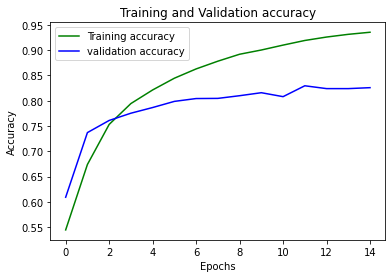

In [44]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(0,15)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

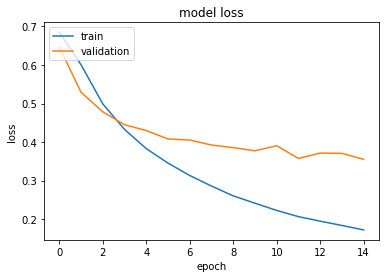

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

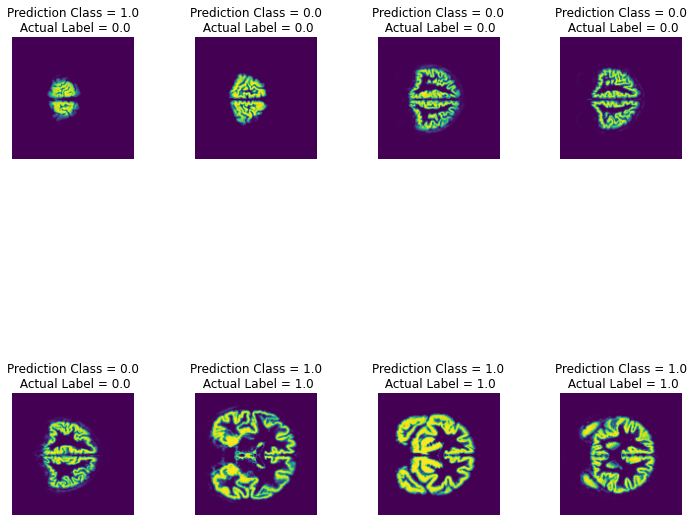

In [46]:
y_predicted=model.predict_classes(X_test)
y_actual=np.argmax(y_test,axis=1)
L = 2
W = 4
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()
for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title(f"Prediction Class = {y_predicted[i]:0.1f}\n Actual Label = {y_actual[i]:0.1f}")
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_actual, y_predicted))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82      1498
           1       0.87      0.79      0.83      1710

    accuracy                           0.83      3208
   macro avg       0.83      0.83      0.83      3208
weighted avg       0.83      0.83      0.83      3208



In [48]:
from sklearn.metrics import precision_score,recall_score,f1_score
print("Precision = " ,precision_score(y_actual, y_predicted))
print("Recall = " ,recall_score(y_actual, y_predicted))
print("F1 Score = " ,f1_score(y_actual, y_predicted))


Precision =  0.8734587929915639
Recall =  0.7871345029239766
F1 Score =  0.8280529067979083


In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 124, 124, 1)       4         
_________________________________________________________________
conv2d (Conv2D)              (None, 122, 122, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 61, 61, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 59, 59, 32)        9248      
_________________________________________________________________
flatten (Flatten)            (None, 111392)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               28516608  
_________________________________________________________________
dropout (Dropout)            (None, 256)               0

In [76]:
!pip install --user shap==0.36.0

In [83]:
!pip install --upgrade tensorflow-gpu==2.1.0

  Using cached tensorflow_gpu-2.1.0-cp36-cp36m-win_amd64.whl (356.5 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.5.0 requires gast==0.4.0, but you have gast 0.2.2 which is incompatible.
tensorflow 2.5.0 requires tensorboard~=2.5, but you have tensorboard 2.1.1 which is incompatible.


  Using cached gast-0.2.2-py3-none-any.whl
  Using cached astor-0.8.1-py2.py3-none-any.whl (27 kB)
  Using cached Keras_Applications-1.0.8-py3-none-any.whl (50 kB)
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0


In [84]:
print(tf.__version__)

2.5.0


In [82]:
print(tf.__version__)

2.5.0


In [49]:
import shap

# since we have two inputs we pass a list of inputs to the explainer
explainer = shap.GradientExplainer(model,X_train)

In [50]:
shap_values = explainer.shap_values(X_test[20:24])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'


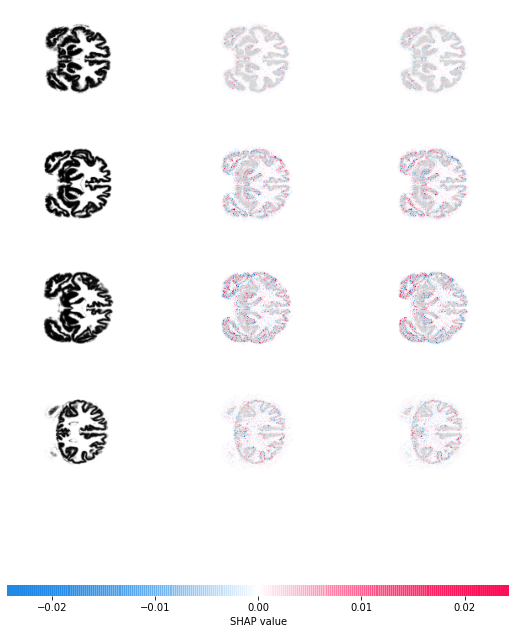

In [52]:
shap.image_plot(shap_values, -X_test[20:24])

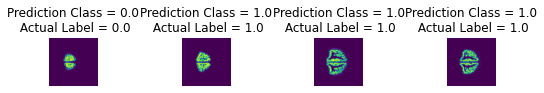

In [51]:
#to find out what input signifies
y_predicted=model.predict_classes(X_test[20:24])
y_actual=np.argmax(y_test[20:24],axis=1)
L = 1
W = 4
fig, axes = plt.subplots(L, W, figsize = (8,8))
axes = axes.ravel()
for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title(f"Prediction Class = {y_predicted[i]:0.1f}\n Actual Label = {y_actual[i]:0.1f}")
    axes[i].axis('off')
plt.subplots_adjust(wspace=1.75)

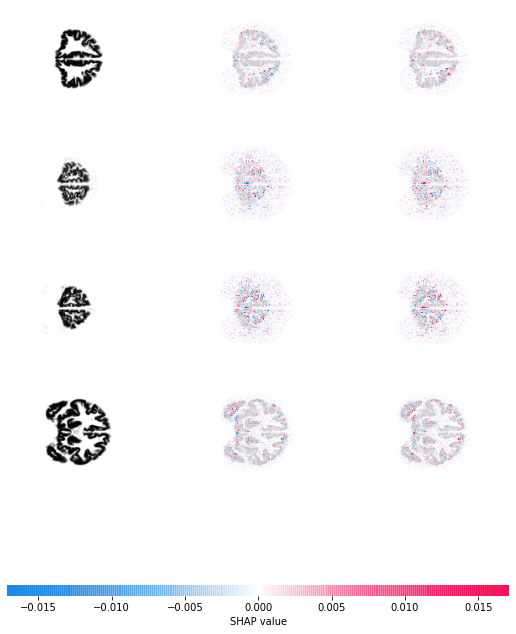

In [53]:
shap_values = explainer.shap_values(X_test[80:84])
shap.image_plot(shap_values, -X_test[80:84])

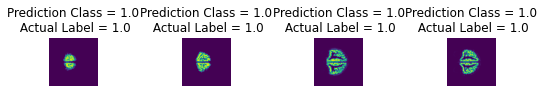

In [54]:
#to find out what input signifies
y_predicted=model.predict_classes(X_test[80:84])
y_actual=np.argmax(y_test[80:84],axis=1)
L = 1
W = 4
fig, axes = plt.subplots(L, W, figsize = (8,8))
axes = axes.ravel()
for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title(f"Prediction Class = {y_predicted[i]:0.1f}\n Actual Label = {y_actual[i]:0.1f}")
    axes[i].axis('off')
plt.subplots_adjust(wspace=1.75)

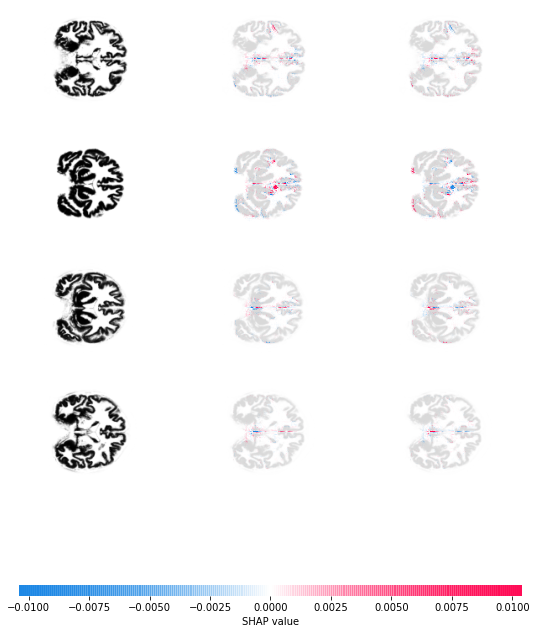

In [63]:
shap_values = explainer.shap_values(X_test[10:14])
shap.image_plot(shap_values, -X_test[10:14])